#  Overview:

### In this note I classify the number images (0-9) from MNIST dataset. I do the following:
### 1) Fully connected Nueral Network
### 2) Convolutional Nueral Network




# 0) Import the data

In [27]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [29]:
mnist = tf.keras.datasets.mnist # Data set related to number characterization in keras dataset. The dataset is named mnist.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # 60K train size and 10k test size


In [30]:
train_images.shape

(60000, 28, 28)

In [34]:
np.max(train_images)

255

In [35]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32) # Make it a number beween 0 and 1 and add another dimension to our tensordue to RGB.
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [36]:
train_images.shape # This is black-white so the last dimension has only one number.

(60000, 28, 28, 1)

In [37]:
np.max(train_images)

1.0

#### Lets first do some visualization

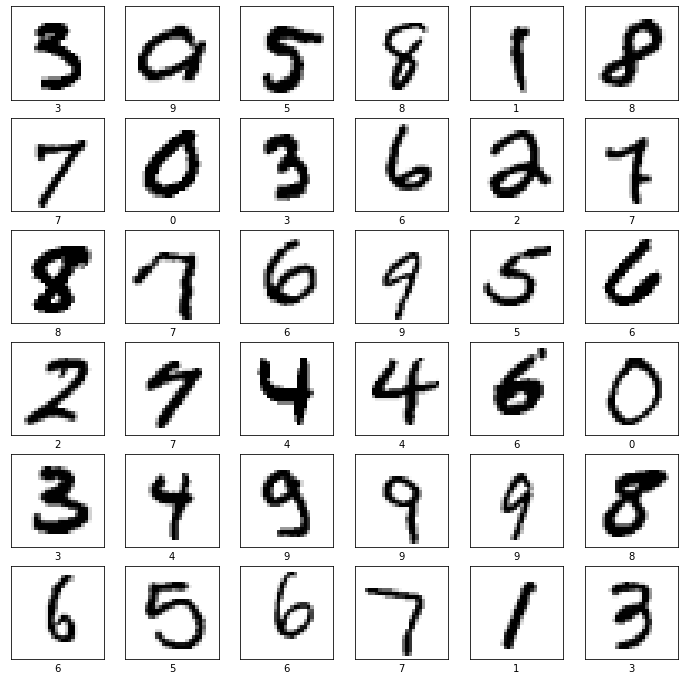

In [38]:
plt.figure(figsize=(12,12))
random_inds = np.random.choice(60000,36) # random_inds = [36 random integer numbers in range(60000)]
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary) # squeeze removes the dimensions with lenght 1
    plt.xlabel(train_labels[image_ind])

#### Now we go to train our model on the images. First, 

# 1) Fully connected layers

Here, we choose each pixel in the figures as a feature. Flatten the 2D images into 1D array and use 28*28 features connect them to the hidden layer(s) and output layer:

In [39]:
def build_fc_model():
    
    fc_model = tf.keras.Sequential([
      # First define a Flatten layer
    tf.keras.layers.Flatten(), # replace 28*28 matrix with a array of 728 numbers 

      #  Define the activation function for the first fully connected (Dense) layer. The activation is needed for non-linearity
    tf.keras.layers.Dense(128, activation= 'relu'), # Other activations: Sigmoid, softmax, softplus, softsign, tanh, selu, elu

      # the second Dense layer to output the classification probabilities
      
    tf.keras.layers.Dense(10, activation= 'softmax')
    ])
    return fc_model
    

model = build_fc_model()

In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),  # Other optimizers : RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl    
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # The optimizer is an algorithm that adjusts the weights to minimize the loss.

In [42]:
BATCH_SIZE = 64
EPOCHS = 5 
# All optimizers belong to the class of stochastical gradient desent. They optimize the weight over a batch of data and iteratively makes 
# the prediction better. Each iteration is Epochs and number of bach is batch_size.

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3650 - accuracy: 0.8990
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1937 - accuracy: 0.9450
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1469 - accuracy: 0.9579
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1191 - accuracy: 0.9661
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1019 - accuracy: 0.9710


The above accuracy is on the training set. We should calculate it on test or cross validation set

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 898us/step - loss: 0.1081 - accuracy: 0.9687
Test accuracy: 0.9686999917030334


In the previous method, we assumed each pixel as a feature and then fully connected them to the next layer. This is not a good method for image processing since in pictures it is the structure of pixels which is important as a feature and not pixels themselves.
CNN, first extract new features by some C. layers and then connect the new features to the next layer of Neurons.

# 2) Convolutional Nueral network

In [45]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        #  first convolutional layer
        # We could use strides=1,padding='same' in next layers
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu), 

        #  first max pooling layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        #  second convolutional layer
    tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # second max pooling layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # the last Dense layer to output the classification 

    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

The model summary shows each convolutional layer transfer the data into (x-2,y-2,d) size where x,y is the input size of image and d
is the filter size. (This is for stride=1 where the kernel moves with 1 pixel on the image).
Maxpool compress the features and avoids having large features.

In [46]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy'
            , metrics=['accuracy']) 

In [47]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.1938 - accuracy: 0.9408
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0384 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0245 - accuracy: 0.9925


In [49]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


99% is a very good acuracy on the test set

In [50]:
predictions = cnn_model.predict(test_images)

We can run the following cell for some visualization of our prediction

3
Label of this digit is: 3


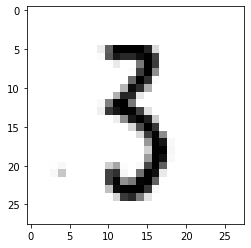

In [58]:
i=np.random.choice(10000) # random choice from 0-9999
prediction = np.argmax(predictions[i]) 

print(prediction)

print("Label of this digit is:", test_labels[i])
plt.imshow(test_images[i,:,:,0], cmap=plt.cm.binary)

We can also do some augmentation in our dataset. However, for the current dataset it is not needed as it is large enough and simple and we already get a reasonable accuracy. Here is a list of some of possible augmentations:

In [ ]:
#augment = keras.Sequential([
    # preprocessing.RandomContrast(factor=0.5),
    # preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
    # preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
    # preprocessing.RandomWidth(factor=0.15), # horizontal stretch
    # preprocessing.RandomRotation(factor=0.20),
    # preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
#]) ## put some of above in the sequential before constructing the conv layers
